In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
from scipy import stats
warnings.simplefilter(action='ignore')

In [11]:
data = pd.read_csv('data/clean_data_feats.csv')

In [12]:
data.shape

(17830, 41)

In [51]:
data['MA_Exp_Month_Paym'].value_counts()

0.0        12312
3000.0       229
6000.0       228
2000.0       220
4000.0       205
           ...  
4150.0         1
3670.0         1
7100.0         1
12700.0        1
1470.0         1
Name: MA_Exp_Month_Paym, Length: 505, dtype: int64

In [11]:
data.columns

Index(['nnkd', 'mob', 'MOB_term', 'Credit_TermApr', 'curr_del_cap_share_one',
       'curr_rep_cap_share_one', 'bad', 'maxdelay_one', 'DaysInCollection_one',
       'delays_one', 'MA_AGE', 'MA_Gender', 'MA_Education',
       'MA_Marital_Status', 'MANUMBEROFCHILD', 'MA_Residential_Status',
       'MA_MONTH_AT_CURR_ADDRESS', 'MA_Real_Estate_Owner',
       'MA_REG_Same_Fact_Addr', 'MA_MONTH_AT_CURR_PASSP', 'MA_Exp_IND',
       'MA_Exp_Month_Paym', 'MA_MONTH_AT_CURR_JOB', 'MA_Time_Previous_Job',
       'MA_Installment_Amount', 'MA_Proposed_Amount', 'MA_Proposed_Term',
       'TOT_INCOME', 'PARTWH_INCOME', 'PAYMD2TOTPAYM', 'PTI'],
      dtype='object')

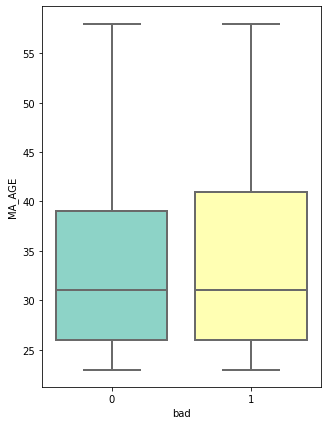

In [30]:
plt.figure(figsize=(5,7))
sns.boxplot(x=data['bad'], y=data['MA_AGE'], linewidth=2, palette='Set3', saturation=1)
plt.show()

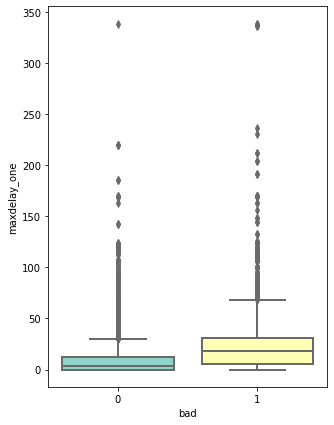

In [46]:
plt.figure(figsize=(5,7))
sns.boxplot(x=data['bad'], y=data['maxdelay_one'], linewidth=2, palette='Set3', saturation=1)
plt.show()

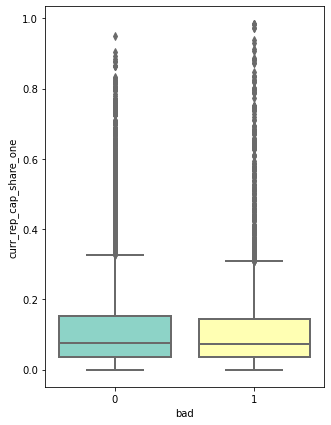

In [45]:
plt.figure(figsize=(5,7))
sns.boxplot(x=data['bad'], y=data['curr_rep_cap_share_one'], linewidth=2, palette='Set3', saturation=1)
plt.show()

In [34]:
data = pd.read_csv('data/clean_data_0.csv')
data.drop(['DaysInCollection_one', 'nnkd'], axis=1, inplace=True)

In [ ]:
data['ratio_inst_amount'] = data['MA_Installment_Amount']/data['Credit_TermApr']

In [4]:
def get_age_label(age_years):
    if age_years < 27: return 1
    elif age_years < 40: return 2
    elif age_years < 50: return 3
    elif age_years < 65: return 4
    else: return 0

In [47]:
data['diff_white_pti'] = data['TOT_INCOME']*data['PARTWH_INCOME'] - data['TOT_INCOME']*data['PTI']
data['ratio_time_job'] = data['MA_Time_Previous_Job']/data['MA_MONTH_AT_CURR_JOB']
data['ratio_amount_income'] = data['TOT_INCOME']*12 /  data['MA_Proposed_Amount']
data['ration_del_cr'] = data['delays_one']/data['Credit_TermApr']

In [5]:
data['curr_profit_per'] = (data['MA_Installment_Amount']*data['mob'])/data['MA_Proposed_Amount']-1
data['all_profit_per'] = (data['MA_Installment_Amount']*data['Credit_TermApr'])/data['MA_Proposed_Amount'] - 1
data['prof_per_month'] = data['MA_Installment_Amount'] - data['MA_Proposed_Amount']/data['Credit_TermApr']

data['ratio_curr_cap_share'] = data['curr_rep_cap_share_one']/data['curr_del_cap_share_one']
data['ratio_inst_amount'] = data['MA_Installment_Amount']/data['Credit_TermApr']


data['ratio_time_job'] = data['MA_Time_Previous_Job']/data['MA_MONTH_AT_CURR_JOB']
data['ratio_amount_income'] = data['TOT_INCOME']*12 /  data['MA_Proposed_Amount']
data['ration_del_cr'] = data['delays_one']/data['Credit_TermApr']
data['diff_white_pti'] = data['TOT_INCOME']*data['PARTWH_INCOME'] - data['TOT_INCOME']*data['PTI']

data['age_range'] = data['MA_AGE'].apply(lambda x: get_age_label(x))
data['EQ_PP'] = (data['PAYMD2TOTPAYM'] < data['PTI']).astype(int)
data['larger_diff_term'] = ((data['Credit_TermApr']-data['MA_Proposed_Term'])>=0).astype(int)

In [6]:
raw_feats = ['mob','MOB_term', 'Credit_TermApr', 'curr_del_cap_share_one',
       'curr_rep_cap_share_one', 'maxdelay_one',
       'delays_one', 'MA_AGE', 'MA_Gender', 'MA_Education',
       'MA_Marital_Status', 'MANUMBEROFCHILD', 'MA_Residential_Status',
       'MA_MONTH_AT_CURR_ADDRESS', 'MA_Real_Estate_Owner',
       'MA_REG_Same_Fact_Addr', 'MA_MONTH_AT_CURR_PASSP', 'MA_Exp_IND',
       'MA_Exp_Month_Paym', 'MA_MONTH_AT_CURR_JOB', 'MA_Time_Previous_Job',
       'MA_Installment_Amount', 'MA_Proposed_Amount', 'MA_Proposed_Term',
       'TOT_INCOME', 'PARTWH_INCOME', 'PAYMD2TOTPAYM', 'PTI']

raw_num_feats = ['mob', 'MOB_term', 'Credit_TermApr', 'curr_del_cap_share_one',
       'curr_rep_cap_share_one', 'maxdelay_one',
        'MA_AGE', 'MA_MONTH_AT_CURR_ADDRESS', 'MA_MONTH_AT_CURR_PASSP',
       'MA_Exp_Month_Paym', 'MA_MONTH_AT_CURR_JOB', 'MA_Time_Previous_Job',
       'MA_Installment_Amount', 'MA_Proposed_Amount', 'MA_Proposed_Term',
       'TOT_INCOME', 'PARTWH_INCOME', 'PAYMD2TOTPAYM', 'PTI']

raw_cat_feats = ['delays_one','MA_Gender', 'MA_Education','MA_Marital_Status','MANUMBEROFCHILD', 'MA_Residential_Status','MA_Real_Estate_Owner','MA_REG_Same_Fact_Addr', 'MA_Exp_IND']

new_num_feats = ['curr_profit_per', 'all_profit_per', 'prof_per_month', 'ratio_curr_cap_share', 'ratio_inst_amount', 
                'diff_white_pti', 'ratio_time_job', 'ratio_amount_income','ration_del_cr']

new_cat_feats = ['larger_diff_term', 'EQ_PP', 'age_range']

feats_to_ohe = []
#, 'MA_Installment_Amount',
feats_to_drop = ['all_profit_per', 'MOB_term']

feats_to_check = []

In [26]:
ff = ['mob',  'curr_rep_cap_share_one', 'maxdelay_one',
        'MA_AGE', 'MA_MONTH_AT_CURR_ADDRESS', 'MA_MONTH_AT_CURR_PASSP',
               'MA_MONTH_AT_CURR_JOB', 'MA_Time_Previous_Job',
       'MA_Installment_Amount', 'MA_Proposed_Amount',
       'TOT_INCOME', 'PARTWH_INCOME', 'PAYMD2TOTPAYM', 'PTI', 'all_profit_per']

In [27]:
ndata = data[ff]
#ndata.drop(['curr_del_cap_share_one', 'curr_rep_cap_share_one',  'MA_Exp_Month_Paym', 'MA_Proposed_Term', 'MA_Proposed_Amount'], axis=1, inplace=True)
#ndata.drop(feats_to_drop, axis=1, inplace=True)

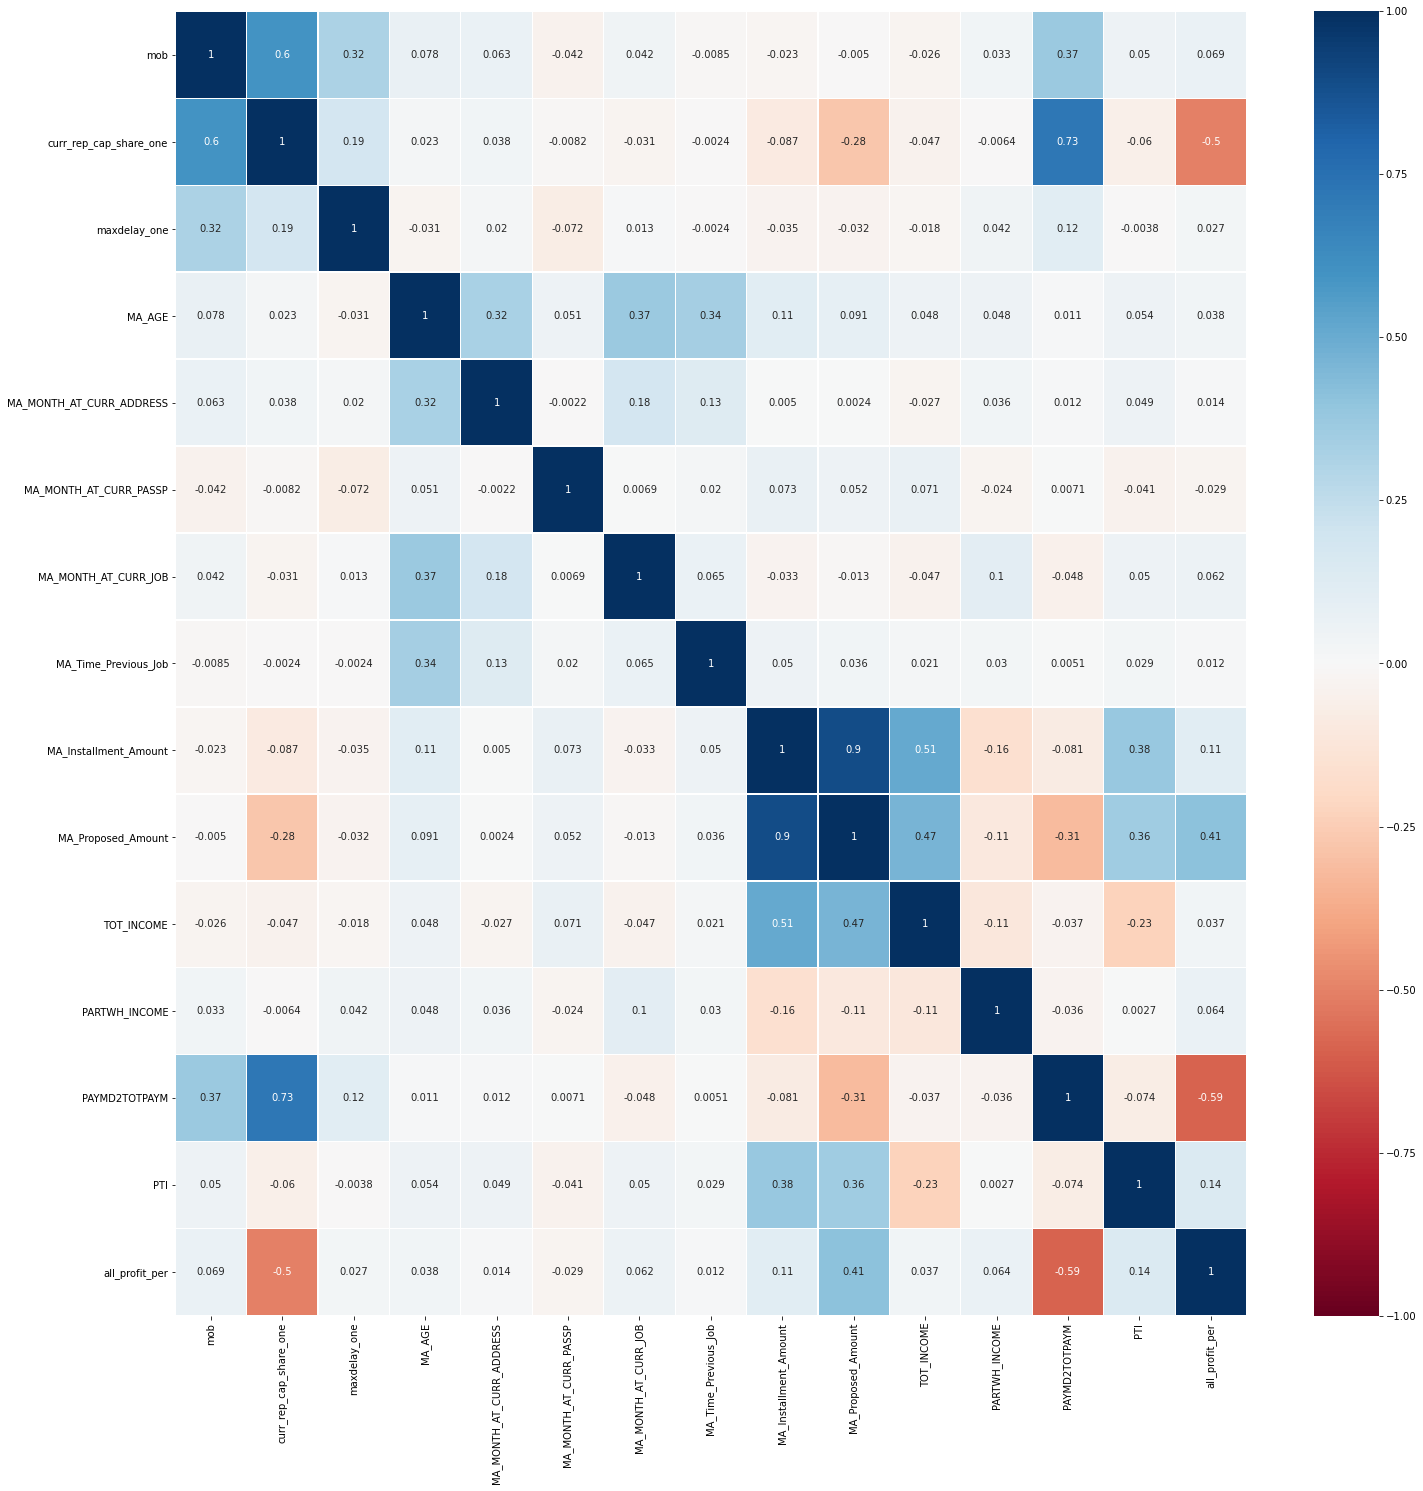

In [28]:
plt.figure(figsize=(24,24))
sns.heatmap(ndata.corr(),cmap='RdBu', annot=True, vmin=-1, vmax=1, linewidths=0.2)
plt.show()

In [81]:
def eda_feat_dist_num(train, feat_name, bin_count=20):
    print(feat_name, ':')
    print(train[feat_name].describe())
    print('----' * 7)
    train[feat_name].hist(bins=bin_count)
    plt.show()

In [ ]:
for feat in raw_num_feats:
    eda_feat_dist_num(data, feat)

In [49]:
data[data['TOT_INCOME']<data['MA_Installment_Amount']][['TOT_INCOME', 'MA_Installment_Amount']]

,TOT_INCOME,MA_Installment_Amount
1068,15000.0,17260.78
1565,15000.0,17260.78


In [110]:
data[data['TOT_INCOME']>1000000]

,nnkd,mob,MOB_term,Credit_TermApr,curr_del_cap_share_one,curr_rep_cap_share_one,bad,maxdelay_one,DaysInCollection_one,delays_one,...,MA_Exp_Month_Paym,MA_MONTH_AT_CURR_JOB,MA_Time_Previous_Job,MA_Installment_Amount,MA_Proposed_Amount,MA_Proposed_Term,TOT_INCOME,PARTWH_INCOME,PAYMD2TOTPAYM,PTI
12200,1-RUR-4500-4163359,5,0.081967,61,0.963021,0.036979,0,0,6,0,...,0.0,12,120,20714.18,750000,60,2938000.0,0.0,0.334666,0.00705


In [116]:
OUTLIERS = [1050, 1537, 12200]

In [124]:
data.drop(OUTLIERS, axis=0, inplace=True)

In [125]:
data.to_csv('data/clean_data_feats.csv', index=False)

In [7]:
final_dataset = pd.DataFrame(columns=['roc', 'w_f1', 'FNR', 'Profit'])

const = pd.DataFrame({'roc': 0.5, 'w_f1': 0.72, 'FNR': 0.19, 'Profit': 0.04},index=['const'])
smm = pd.DataFrame({'roc': 0.74, 'w_f1': 0.74, 'FNR': 0.1, 'Profit': 0.39},index=['logit_sm'])
skm = pd.DataFrame({'roc': 0.69, 'w_f1': 0.75, 'FNR': 0.11, 'Profit': 0.39},index=['logit_skl'])
lgb = pd.DataFrame({'roc': 0.86, 'w_f1': 0.87, 'FNR': 0.09, 'Profit': 0.55},index=['lgb'])

pd.concat([final_dataset, const, smm, skm, lgb])

,roc,w_f1,FNR,Profit
const,0.50,0.72,0.19,0.04
logit_sm,0.74,0.74,0.10,0.39
logit_skl,0.69,0.75,0.11,0.39
lgb,0.86,0.87,0.09,0.55
